<b><font size="3">Installing & Importing Reqired Libraries</font></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from nltk.probability import FreqDist
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jorom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jorom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jorom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jorom\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<b><font size="3">Importing the Dataset</font></b>

In [2]:
reviewsA = pd.read_csv("C:\\Users\\jorom\\Documents\\University\\Trimester 1\\Assignment\\Machine Learning & Data Mining\\Items\\tourist_accommodation_reviews.csv", encoding = "cp1252")
reviewsB = pd.read_csv("C:\\Users\\jorom\\Documents\\University\\Trimester 1\\Assignment\\Machine Learning & Data Mining\\Items\\tourist_accommodation_reviews.csv", encoding = "cp1252")

In [3]:
reviewsA.columns = ["ID", "Date", "Location", "Hotel_Name", "Review"]
reviewsB.columns = ["ID", "Date", "Location", "Hotel_Name", "Review"]

<b><font size="3">Creating & Cleaning Tokens</font></b>

In [4]:
simple_text = 'This isn\'t a real text, this is an example text...... Notice this contains punctuation!!'

In [5]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

tokenized_document = tokenizer.tokenize(simple_text)

print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [6]:
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
cleaned_tokens = []

for word in tokenized_document:
    word = word.lower()
    if word not in stop_words:
        cleaned_tokens.append(word)
        
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [8]:
cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [9]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cati', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n', 'v', 'v', 'n', 'a', 'r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

Lemmatized words:  ['cati', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cati', 'sing', 'hop', 'rock', 'better', 'easili']


In [10]:
stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


<b><font size="3">Creating the Pre-Process Function</font></b>

In [11]:
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

<b><font size="3">Analyzing the Data</font></b>

In [12]:
reviewsA.head()

,ID,Date,Location,Hotel_Name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [13]:
reviewsA.tail()

,ID,Date,Location,Hotel_Name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [14]:
reviewsA.describe()

,ID,Date,Location,Hotel_Name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [15]:
print(reviewsA.groupby("Location").count())

                      ID   Date  Hotel_Name  Review
Location                                           
 Bang Tao Beach      600    600         600     600
 Cape Panwa         1500   1500        1500    1500
 Chalong            1287   1287        1287    1287
 Choeng Thale       3378   3378        3378    3378
 Kamala             3162   3162        3162    3162
 Karon              5826   5826        5826    5826
 Karon Beach         397    397         397     397
 Kata Beach         5752   5752        5752    5752
 Kata Noi Beach      200    200         200     200
 Kathu              1078   1078        1078    1078
 Koh Kaew            293    293         293     293
 Mai Khao           2372   2372        2372    2372
 Nai Harn            881    881         881     881
 Nai Thon             94     94          94      94
 Nai Yang            996    996         996     996
 Pa Khlok            100    100         100     100
 Patong            16403  16403       16403   16403
 Phuket Town

<b><font size="3">Sentimental Analysis</font></b>

<b><font size="3">Top 15 Hotel/Restaurants from Phuket</font></b>

In [16]:
reviews = reviewsA[reviewsA['Location'].str.contains('Phuket Town')]
hotels = ["Eleven Two & Co.", "China Inn Cafe", "Surf and Turf by Soul Kitchen", "La Gaetana", "Rider Cafe", "Mr.Coffee",
          "Dibuk restaurant", "Papaya", "Galerry Cafe by Pinky", "Crust", "Fuji Japanese Restaurant - Central Festival Phuket",
          "Suay Restaurant", "Kopitiam by Wilai", "OSOT", "Blue Elephant Phuket"]
reviews = reviews[reviews.Hotel_Name.isin(hotels) == True]

In [17]:
reviews.head()

,ID,Date,Location,Hotel_Name,Review
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...


In [18]:
reviews.tail()

,ID,Date,Location,Hotel_Name,Review
45543,rn529280390,"Reviewed October 2, 2017",Phuket Town,Fuji Japanese Restaurant - Central Festival Ph...,"Great menu , good prices and pleasant service ..."
45544,rn512997697,"Reviewed August 14, 2017",Phuket Town,Fuji Japanese Restaurant - Central Festival Ph...,The price here was quite higher than other Tha...
45545,rn508813466,"Reviewed August 4, 2017",Phuket Town,Fuji Japanese Restaurant - Central Festival Ph...,I've stayed close to Central Festival a few ti...
45546,rn499546415,"Reviewed July 7, 2017",Phuket Town,Fuji Japanese Restaurant - Central Festival Ph...,A well established and frequented Japanese res...
45547,rn491968050,"Reviewed June 10, 2017",Phuket Town,Fuji Japanese Restaurant - Central Festival Ph...,This was a good spot for a date night out.\r\n...


In [19]:
print(reviews.groupby("Location").count())

                ID  Date  Hotel_Name  Review
Location                                    
 Phuket Town  1394  1394        1394    1394


In [20]:
print(reviews.groupby("Hotel_Name").count())

                                                     ID  Date  Location  \
Hotel_Name                                                                
Blue Elephant Phuket                                100   100       100   
China Inn Cafe                                       99    99        99   
Crust                                               100   100       100   
Dibuk restaurant                                     95    95        95   
Eleven Two & Co.                                    100   100       100   
Fuji Japanese Restaurant - Central Festival Phuket  100   100       100   
Kopitiam by Wilai                                   100   100       100   
La Gaetana                                          100   100       100   
Mr.Coffee                                           100   100       100   
OSOT                                                100   100       100   
Papaya                                              100   100       100   
Rider Cafe               

In [21]:
sentiment = SentimentIntensityAnalyzer()

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]

In [22]:
reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1394.000000,1394.000000,1394.000000,1394.000000
mean,0.725329,0.020491,0.735549,0.243958
std,0.331422,0.038985,0.127011,0.130534
min,-0.933100,0.000000,0.287000,0.000000
25%,0.669600,0.000000,0.651250,0.150250
50%,0.858800,0.000000,0.743000,0.238000
75%,0.928700,0.035000,0.827000,0.331000
max,0.990400,0.279000,1.000000,0.713000


<AxesSubplot:xlabel='compound', ylabel='Count'>

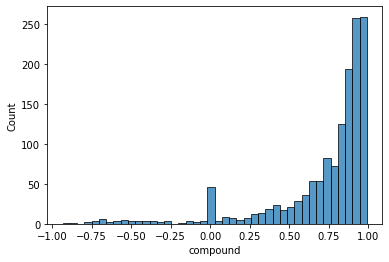

In [23]:
sns.histplot(reviews['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

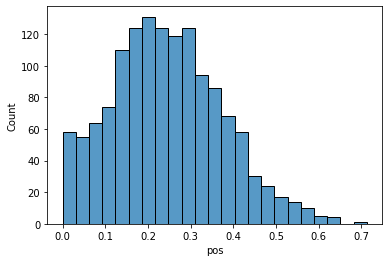

In [24]:
sns.histplot(reviews['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

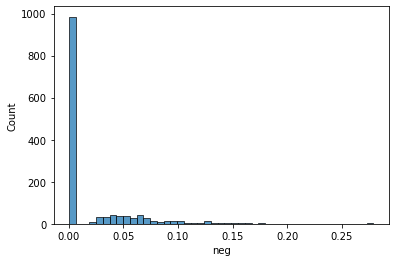

In [25]:
sns.histplot(reviews['neg'])

In [26]:
(reviews['compound']<=0).groupby(reviews['Hotel_Name']).sum()

Hotel_Name
Blue Elephant Phuket                                   4
China Inn Cafe                                         6
Crust                                                  6
Dibuk restaurant                                      13
Eleven Two & Co.                                       9
Fuji Japanese Restaurant - Central Festival Phuket     5
Kopitiam by Wilai                                     10
La Gaetana                                             7
Mr.Coffee                                              7
OSOT                                                   3
Papaya                                                 5
Rider Cafe                                             7
Suay Restaurant                                        7
Surf and Turf by Soul Kitchen                          5
Name: compound, dtype: int64

In [27]:
percentage_positive = pd.DataFrame((reviews['compound']>=0).groupby(reviews['Hotel_Name']).sum()
                                  /reviews['Review'].groupby(reviews['Hotel_Name']).count()*100,
                                  columns = ['% positive reviews']).sort_values(by='% positive reviews')
percentage_positive

,% positive reviews
Hotel_Name,
Eleven Two & Co.,94.000000
China Inn Cafe,94.949495
La Gaetana,95.000000
Mr.Coffee,95.000000
Rider Cafe,95.000000
Surf and Turf by Soul Kitchen,95.000000
Dibuk restaurant,95.789474
Crust,96.000000
Fuji Japanese Restaurant - Central Festival Phuket,96.000000


In [28]:
percentage_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Hotel_Name']).sum()
                                  /reviews['Review'].groupby(reviews['Hotel_Name']).count()*100,
                                  columns = ['% negative reviews']).sort_values(by='% negative reviews')
percentage_negative

,% negative reviews
Hotel_Name,
OSOT,3.000000
Blue Elephant Phuket,4.000000
Fuji Japanese Restaurant - Central Festival Phuket,5.000000
Papaya,5.000000
Surf and Turf by Soul Kitchen,5.000000
Crust,6.000000
China Inn Cafe,6.060606
La Gaetana,7.000000
Mr.Coffee,7.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel_Name'>

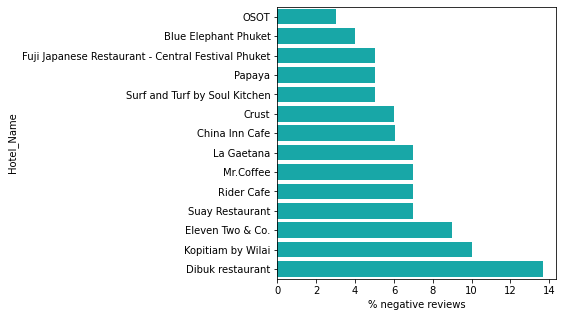

In [29]:
plt.figure(figsize = (5, 5))

sns.barplot(data=percentage_negative, x='% negative reviews', y=percentage_negative.index, color='c')

In [30]:
reviews['processed_review'] = reviews['Review'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['Hotel_Name']=='Dibuk restaurant')
                                     & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['Hotel_Name']=='Dibuk restaurant')
                                     & (reviews['compound']<0),:]

reviews_positive_subset.head()

,ID,Date,Location,Hotel_Name,Review,compound,neg,neu,pos,processed_review
40390,rn572040374,"Reviewed April 8, 2018",Phuket Town,Dibuk restaurant,"I've had lots, and LOTS of authentic Pad Thai ...",0.8777,0.000,0.790,0.210,"[i'v, lot, lot, authent, pad, thai, throughout..."
40391,rn560650559,"Reviewed February 15, 2018",Phuket Town,Dibuk restaurant,We were recommended this restaurant seven year...,0.5623,0.064,0.781,0.155,"[recommend, restaur, seven, year, ago, visit, ..."
40392,rn552213417,"Reviewed January 7, 2018",Phuket Town,Dibuk restaurant,"Very authentic and unique restaurant, nice ser...",0.8162,0.054,0.748,0.197,"[authent, uniqu, restaur, nice, servic, love, ..."
40393,rn550324696,"Reviewed December 30, 2017",Phuket Town,Dibuk restaurant,"Wow, what a find. This is an inauspicious look...",0.9728,0.000,0.630,0.370,"[wow, find, inauspici, look, place, breathtaki..."
40394,rn550090908,"Reviewed December 29, 2017",Phuket Town,Dibuk restaurant,We stumbled across this place on a sweltering ...,0.8895,0.000,0.715,0.285,"[stumbl, across, place, swelter, lunchtim, dec..."


<function matplotlib.pyplot.show(close=None, block=None)>

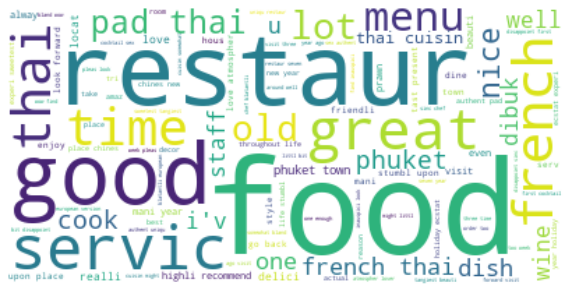

In [31]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(pos_tokens))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

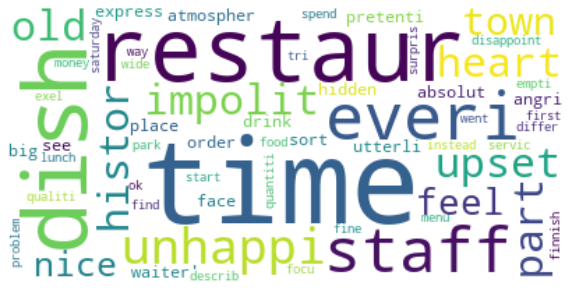

In [32]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(neg_tokens))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [33]:
pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   food    thai restaur    good  french   place  servic  phuket    time    best 
     56      45      43      28      26      25      22      22      20      20 


In [34]:
neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

   time restaur    dish       2   everi   staff unhappi impolit     i'm   upset 
      4       2       2       1       1       1       1       1       1       1 


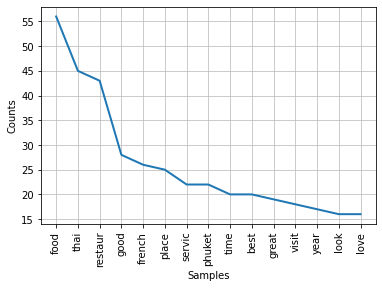

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
pos_freqdist.plot(15)

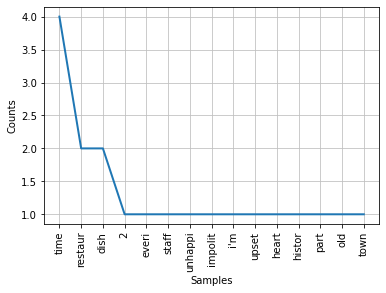

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
neg_freqdist.plot(15)

<b><font size="3">Top 15 Hotel/Restaurants from Choeng</font></b>

In [37]:
reviews = reviewsB[reviewsB['Location'].str.contains('Choeng Thale')]
hotels = ["Siam Supper Club", "Red Tuna Restaurant Phuket", "The Corner Restaurant", "Dee Plee - Anantara Layan Phuket Resort",
         "Bampot Kitchen & Bar", "The Beach Cuisine", "DeDos", "Golden Paradise Restaurant", "KEE Sky Lounge & Restaurant",
         "360 ° Bar", "Benny's American Bar & Grill", "Nok and Jo's Restaurant", "Audy Restaurant", "Ann's Kitchen Bar and Grill",
         "Taste Bar & Grill"]
reviews = reviews[reviews.Hotel_Name.isin(hotels) == True]

In [38]:
reviews.head()

,ID,Date,Location,Hotel_Name,Review
300,rn580036469,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,The view and Thai food served at Dee Plee are ...
301,rn580019506,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,We celebrated our honeymoon at Anantara and tr...
302,rn577321057,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Great Thai Food with and amazing View and Frie...
303,rn577073620,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Was occasionally in this place! Despite it was...
304,rn576749505,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Dee Plee is the Signature Thai restaurant of t...


In [39]:
reviews.tail()

,ID,Date,Location,Hotel_Name,Review
33992,rn546506667,"Reviewed December 10, 2017",Choeng Thale,KEE Sky Lounge & Restaurant,The food was delicious and well portioned and ...
33993,rn544801988,"Reviewed December 3, 2017",Choeng Thale,KEE Sky Lounge & Restaurant,From entering the elevator going up to the 6th...
33994,rn540816917,"Reviewed November 13, 2017",Choeng Thale,KEE Sky Lounge & Restaurant,"Lovely food, great cocktails and all moderatel..."
33995,rn539007477,"Reviewed November 6, 2017",Choeng Thale,KEE Sky Lounge & Restaurant,This our third time to The Kee and always rece...
33996,rn538198423,"Reviewed November 3, 2017",Choeng Thale,KEE Sky Lounge & Restaurant,On the rooftop of the resort was this restaura...


In [40]:
print(reviews.groupby("Location").count())

                 ID  Date  Hotel_Name  Review
Location                                     
 Choeng Thale  1491  1491        1491    1491


In [41]:
print(reviews.groupby("Hotel_Name").count())

                                          ID  Date  Location  Review
Hotel_Name                                                          
360 ° Bar                                100   100       100     100
Ann's Kitchen Bar and Grill              100   100       100     100
Audy Restaurant                          100   100       100     100
Bampot Kitchen & Bar                     100   100       100     100
Benny's American Bar & Grill             100   100       100     100
DeDos                                    100   100       100     100
Dee Plee - Anantara Layan Phuket Resort   93    93        93      93
Golden Paradise Restaurant               100   100       100     100
KEE Sky Lounge & Restaurant               98    98        98      98
Nok and Jo's Restaurant                  100   100       100     100
Red Tuna Restaurant Phuket               100   100       100     100
Siam Supper Club                         100   100       100     100
Taste Bar & Grill                 

In [42]:
sentiment = SentimentIntensityAnalyzer()

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]

In [43]:
reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1491.000000,1491.000000,1491.000000,1491.000000
mean,0.759793,0.017359,0.723803,0.258835
std,0.307959,0.035580,0.125739,0.130136
min,-0.956200,0.000000,0.320000,0.000000
25%,0.732500,0.000000,0.636000,0.163000
50%,0.886000,0.000000,0.724000,0.258000
75%,0.941250,0.026000,0.812000,0.350000
max,0.989700,0.330000,1.000000,0.680000


<AxesSubplot:xlabel='compound', ylabel='Count'>

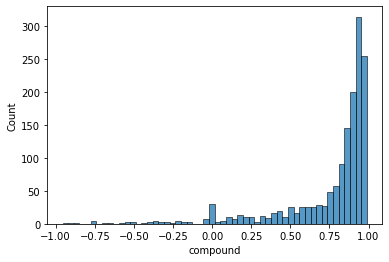

In [44]:
sns.histplot(reviews['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

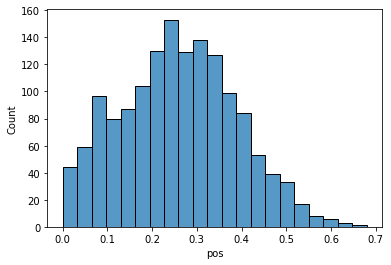

In [45]:
sns.histplot(reviews['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

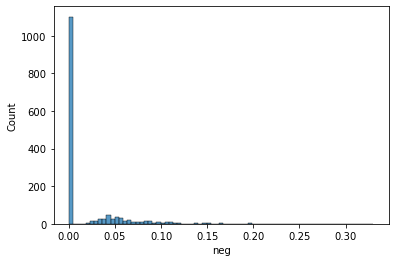

In [46]:
sns.histplot(reviews['neg'])

In [47]:
(reviews['compound']<=0).groupby(reviews['Hotel_Name']).sum()

Hotel_Name
360 ° Bar                                  5
Ann's Kitchen Bar and Grill                5
Audy Restaurant                            5
Bampot Kitchen & Bar                       3
Benny's American Bar & Grill               5
DeDos                                      4
Dee Plee - Anantara Layan Phuket Resort    2
Golden Paradise Restaurant                 4
KEE Sky Lounge & Restaurant                6
Nok and Jo's Restaurant                    8
Red Tuna Restaurant Phuket                 7
Siam Supper Club                           4
Taste Bar & Grill                          7
The Beach Cuisine                          4
The Corner Restaurant                      5
Name: compound, dtype: int64

In [48]:
percentage_positive = pd.DataFrame((reviews['compound']>=0).groupby(reviews['Hotel_Name']).sum()
                                  /reviews['Review'].groupby(reviews['Hotel_Name']).count()*100,
                                  columns = ['% positive reviews']).sort_values(by='% positive reviews')
percentage_positive

,% positive reviews
Hotel_Name,
Ann's Kitchen Bar and Grill,95.000000
Taste Bar & Grill,95.000000
360 ° Bar,96.000000
Audy Restaurant,96.000000
Benny's American Bar & Grill,96.000000
Nok and Jo's Restaurant,96.000000
KEE Sky Lounge & Restaurant,96.938776
Bampot Kitchen & Bar,97.000000
DeDos,97.000000


In [49]:
percentage_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Hotel_Name']).sum()
                                  /reviews['Review'].groupby(reviews['Hotel_Name']).count()*100,
                                  columns = ['% negative reviews']).sort_values(by='% negative reviews')
percentage_negative

,% negative reviews
Hotel_Name,
Dee Plee - Anantara Layan Phuket Resort,2.150538
Bampot Kitchen & Bar,3.000000
DeDos,4.000000
Golden Paradise Restaurant,4.000000
Siam Supper Club,4.000000
The Beach Cuisine,4.000000
360 ° Bar,5.000000
Ann's Kitchen Bar and Grill,5.000000
Audy Restaurant,5.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel_Name'>

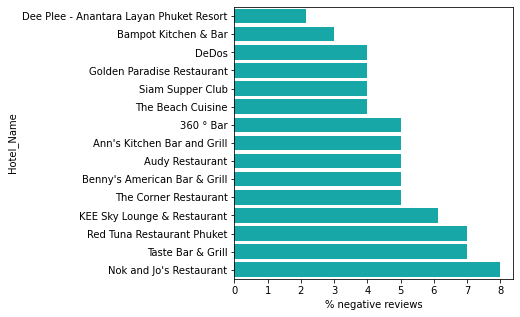

In [50]:
plt.figure(figsize = (5, 5))

sns.barplot(data=percentage_negative, x='% negative reviews', y=percentage_negative.index, color='c')

In [51]:
reviews['processed_review'] = reviews['Review'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['Hotel_Name']=="Nok and Jo's Restaurant")
                                     & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['Hotel_Name']=="Nok and Jo's Restaurant")
                                     & (reviews['compound']<0),:]

reviews_positive_subset.head()

,ID,Date,Location,Hotel_Name,Review,compound,neg,neu,pos,processed_review
18152,rn577280446,Reviewed 2 weeks ago,Choeng Thale,Nok and Jo's Restaurant,Tons of Thai and international choices on the ...,0.8625,0.000,0.810,0.190,"[ton, thai, intern, choic, menu, order, yam, w..."
18153,rn574908138,Reviewed 4 weeks ago,Choeng Thale,Nok and Jo's Restaurant,We came here on the Wednesday night for the bb...,0.7003,0.000,0.879,0.121,"[came, wednesday, night, bbq, ladi, boy, show,..."
18154,rn573932151,Reviewed 4 weeks ago,Choeng Thale,Nok and Jo's Restaurant,Had very warm welcome from Joe and his team. F...,0.8766,0.115,0.582,0.303,"[warm, welcom, joe, team, food, good, price, r..."
18155,rn572113222,"Reviewed April 9, 2018",Choeng Thale,Nok and Jo's Restaurant,We came for lunch after a long drive. My wife ...,0.9039,0.041,0.674,0.285,"[came, lunch, long, drive, wife, realli, nice,..."
18156,rn571932500,"Reviewed April 8, 2018",Choeng Thale,Nok and Jo's Restaurant,Very different place to go built from debris o...,0.6908,0.000,0.878,0.122,"[differ, place, go, built, debri, tsunami, pop..."


<function matplotlib.pyplot.show(close=None, block=None)>

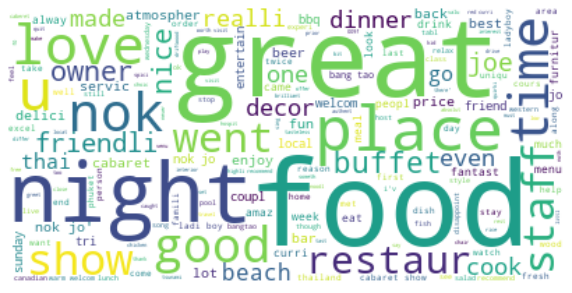

In [52]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(pos_tokens))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

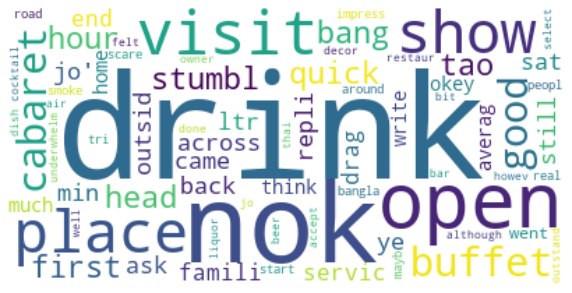

In [53]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(neg_tokens))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [54]:
pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

 food great   nok night place  show  love  time  good staff 
   52    44    39    31    30    26    23    22    21    19 


In [55]:
neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

  drink     nok    open   visit   place    show  buffet cabaret    good   first 
      2       2       2       2       2       2       2       2       2       1 


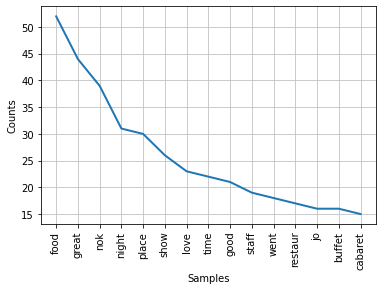

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
pos_freqdist.plot(15)

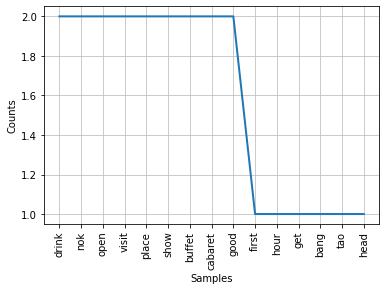

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
neg_freqdist.plot(15)